# NLTK 


NLTK or Natural Language Toolkit is the *de-facto* standard python module for building and running natural language processing applications in the language.

It consists of a collection of widely used datasets and algorithms for language processing applications such as tokenizers, part-of-speech taggers, stopword sets, standard text sets and trainable machine-learning algorithms.

Using the toolkit requires a reasonable working knowledge of Python which hopefully by studying the [preceeding exercises](https://brainsteam.co.uk/wiki/public:phd:teaching:cs918) you will have by now.

In this exercise we will use a number of the skills we have already examined to do some analysis on the [ART corpus](https://www.aber.ac.uk/en/cs/research/cb/projects/art/art-corpus/).

## About the dataset

If you have been through the XML exercise then you will already have been briefly introduced to the corpus. It consists of 225 biochemistry papers that have been broken up into individual sentences.

Each sentence has also been annotated with a label that describes the core scientific concept (CoreSC) that the sentence encapsulates.

For example, a sentence might be labelled "Motivation" if it explains why the author is carrying out a particular study or it might be labelled "Hypothesis" if it discusses expected results of a study. You can find out more about the annotation scheme specification [in this paper by Liakata et al. 2010](http://www.lrec-conf.org/proceedings/lrec2010/pdf/644_Paper.pdf).

## What can we find out?

Let's play with the data! We know that a particular sentence has a particular label. From this, can we make any assumptions about the words in the sentences? Are there some words that occur more frequently in some types of sentences?

Let's find out...

## Preparing the data

The first thing we need to do is extract a list of sentences and their respective CoreSC label. I have downloaded the ART corpus `tar.gz` file and placed it in the assets folder in this project. The following code iterates over the contained folders, finding all XML files and parsing them.

First we import requisite libraries...

In [3]:
import nltk
import os #we haven't used this one before. Check out the docs https://docs.python.org/3/library/os.html

import xml.etree.ElementTree as ET

We define a function for parsing the paper, extracting sentences and returning a list of tuples (sentence text,label)


In [4]:
def extract_paper(filename):
    
    #open and parse the paper
    tree = ET.parse("assets/b414459g_mode2.xml")
    root = tree.getroot()
    
    sents = []
    
    #iterate through sentences
    for sent in root.iter("s"):
        annoArt = sent.find('annotationART')
        id = sent.get("sid")
        text = "".join(annoArt.itertext())
        coreSC = annoArt.get("type")
        sents.append( (filename, id, text,coreSC) )
    
    return sents


We iterate through all papers in the ART corpus using [`os.walk`](https://docs.python.org/3/library/os.html#os.walk) which recursively steps through all files and subdirectories in a given directory, allowing you to process any file of interest.

In [5]:
art_path = "assets/ART_Corpus"

all_sents = []

filecount = 0

# this layer of the for loop iterates through each subdirectory of the given path
# producing a list of directories and files in that immediate directory.
# root represents the (sub)directory currently being inspected
for root, dirs, files in os.walk(art_path):
    
    #we loop through the list of files in the current subdirectory
    for file in files:
        
        if file.endswith(".xml"):
            filecount += 1
            #we use os.path.join to concatenate the directory name and file name safely
            #with respect to slashes in the path
            fullpath = os.path.join(root,file)
            
            #we parse the file and keep the sentences
            all_sents += extract_paper(file)
            
#lets get a total count of sentences collected and files examined
print("Inspected {} files".format(filecount))
print ("Collected {} sentences".format(len(all_sents)))

Inspected 225 files
Collected 16650 sentences


As a sanity check, let's inspect 5 sentences in the array and make sure that they are of the format (filename, id, some text, coresc). We use the standard library module [`random`](https://docs.python.org/3.0/library/random.html) to pick 5 from the list at random. 

In [6]:
import random

randsents = random.sample(all_sents,5)

for senttuple in randsents:
    print (senttuple)

('b315252a_mode2.xml', '56', 'Indeed, the invariance of the resonant wavelengths with power also suggests that the refractive index of the droplet is constant, reinforcing the conclusion that there is no significant change in temperature.5', 'Res')
('b315034h_mode2.xml', '12', 'By creating two optical traps, two droplets can be manipulated simultaneously, providing the unique opportunity to study the coagulation of two droplets directly.', 'Mot')
('b415247f_mode2.xml', '36', 'The axial trapping efficiency of a droplet, Q, can be determined by measuring the minimum incident laser power, P, required to counterbalance the gravitational force experienced by the particle, F6,14,17.The refractive index of the surrounding medium is denoted by n, the speed of light by c, the particle density by ρ and the gravitational acceleration by g.17', 'Mod')
('b506280b_mode2.xml', '64', 'The intensity of the CERS signal shows a strong inverse correlation with laser power (Fig. 4(b)), suggesting that the 

This looks right. Out of curiosity, lets see how many of each CoreSC type there are and plot a Pie chart using matplotlib.


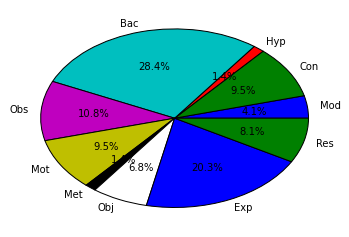

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

#read about the counter object on the 
#collections doc page (https://docs.python.org/3/library/collections.html#collections.Counter)
from collections import Counter 

c = Counter([ lbl for file, id, text, lbl in all_sents])

total = len(all_sents)

percentages = { x: (c[x] / total * 100) for x in c }

labels = [ x for x in percentages.keys() ]
values = [ percentages[x] for x in labels]

plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.show()

So we see that there is quite a lot of variation in the types of sentences and their respective representation within the corpus. Background takes up over a quarter of the total number of sentences and hypothesis a measly 1.4%.

We need to remember this in our experiments - all CoreSCs are not born equal - some are more likely to occur than others.

## Word distributions

Let's look at which words are most likely to occur in different sentence types. We build a dictionary of words by parsing and tokenizing every single sentence in our collection. We store a record of each word's occurence in each CoreSC so that we can build a frequency distribution table later. We will depend upon NLTK heavily for this work.

### Tokenizing sentences
First we use `nltk.word_tokenize` to break down each sentence into a series of "words" and build a dictionary

In [18]:
dictionary = Counter()

for file, id, text, lbl in all_sents:
    
    words = nltk.word_tokenize(text)
    dictionary.append(words)
    
print(dictionary)

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/home/james/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************